In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import tensorflow as tf




In [3]:
import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("../input/dogs-vs-cats/test1.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("../input/dogs-vs-cats/train.zip","r") as z:
    z.extractall(".")
    

['dogs-vs-cats']


In [4]:
IMAGE_FOLDER_PATH="./train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
print(FILE_NAMES)

categories = []
for filename in FILE_NAMES:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append("1")
    else:
        categories.append("0")

df = pd.DataFrame({
    'filename': FILE_NAMES,
    'category': categories
})

['cat.5496.jpg', 'cat.5648.jpg', 'cat.7484.jpg', 'cat.597.jpg', 'dog.9184.jpg', 'cat.3170.jpg', 'dog.8225.jpg', 'dog.12482.jpg', 'cat.3080.jpg', 'dog.10695.jpg', 'cat.10600.jpg', 'cat.2438.jpg', 'dog.340.jpg', 'cat.5724.jpg', 'cat.9911.jpg', 'cat.4450.jpg', 'dog.7455.jpg', 'cat.12333.jpg', 'dog.3927.jpg', 'cat.12293.jpg', 'cat.9645.jpg', 'cat.711.jpg', 'dog.12477.jpg', 'cat.105.jpg', 'dog.9431.jpg', 'cat.7805.jpg', 'dog.859.jpg', 'cat.2373.jpg', 'dog.6638.jpg', 'dog.3203.jpg', 'dog.10706.jpg', 'dog.2879.jpg', 'cat.3127.jpg', 'dog.5495.jpg', 'dog.8687.jpg', 'dog.8157.jpg', 'dog.582.jpg', 'dog.9897.jpg', 'dog.1917.jpg', 'dog.674.jpg', 'cat.8031.jpg', 'cat.7588.jpg', 'dog.1610.jpg', 'dog.7589.jpg', 'dog.4134.jpg', 'dog.613.jpg', 'cat.8632.jpg', 'cat.2751.jpg', 'cat.440.jpg', 'dog.11208.jpg', 'dog.1343.jpg', 'cat.11048.jpg', 'cat.6548.jpg', 'cat.9268.jpg', 'cat.7838.jpg', 'dog.3837.jpg', 'cat.7634.jpg', 'cat.4373.jpg', 'dog.8898.jpg', 'cat.8811.jpg', 'cat.4881.jpg', 'dog.6946.jpg', 'dog.99

In [5]:
df.head()

,filename,category
0,cat.5496.jpg,0
1,cat.5648.jpg,0
2,cat.7484.jpg,0
3,cat.597.jpg,0
4,dog.9184.jpg,1


See total in count

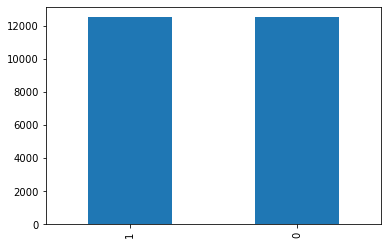

In [6]:
df['category'].value_counts().plot.bar()

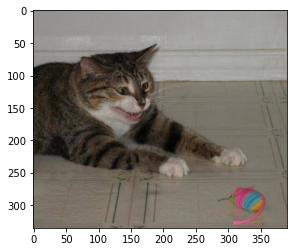

In [7]:
sample = random.choice(FILE_NAMES)
image = load_img("./train/"+sample)
plt.imshow(image)

Build Model

In [8]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

Prepare Test and Train Data

In [9]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [10]:
train_df.head()

,index,filename,category
0,17622,dog.87.jpg,1
1,2110,dog.3939.jpg,1
2,13700,dog.11328.jpg,1
3,22630,cat.11233.jpg,0
4,9074,cat.1233.jpg,0


Traning Generator

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.


Validation generator

In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


See sample generated images

Found 10 validated image filenames belonging to 2 classes.


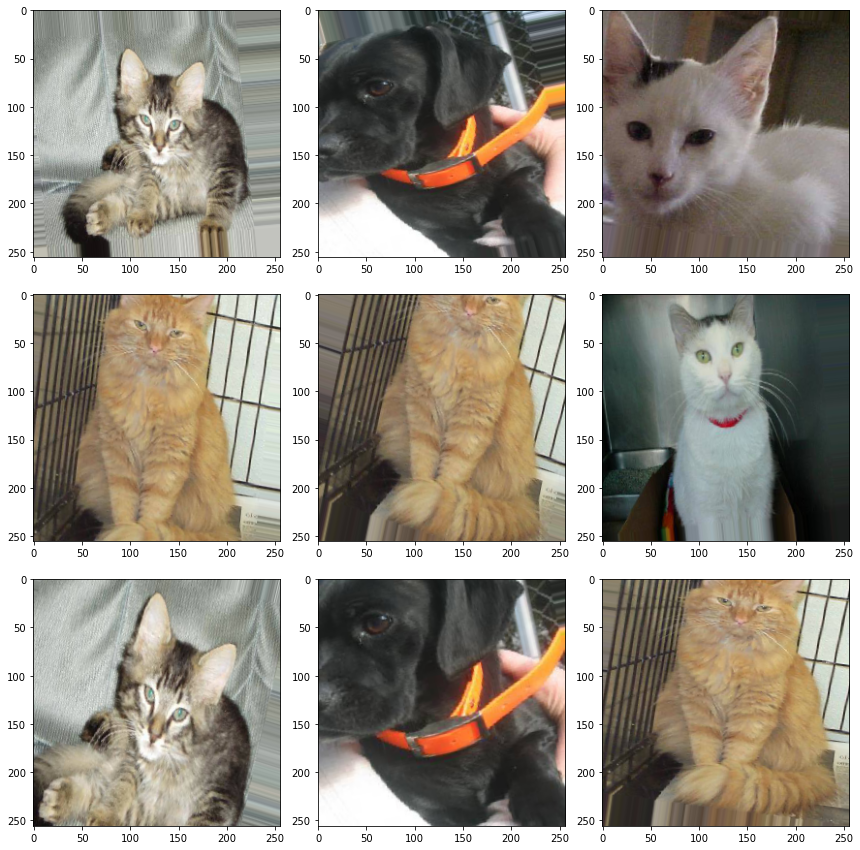

In [13]:
example_df = train_df.sample(n=10).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Fit Model

In [14]:
# fine-tune the model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/5
1406/1406 [==============================] - 314s 223ms/step - loss: 0.2823 - accuracy: 0.8711 - val_loss: 0.1346 - val_accuracy: 0.9443
Epoch 2/5
1406/1406 [==============================] - 315s 224ms/step - loss: 0.1505 - accuracy: 0.9385 - val_loss: 0.1139 - val_accuracy: 0.9531
Epoch 3/5
1406/1406 [==============================] - 317s 225ms/step - loss: 0.1246 - accuracy: 0.9500 - val_loss: 0.0980 - val_accuracy: 0.9611
Epoch 4/5
1406/1406 [==============================] - 319s 227ms/step - loss: 0.1109 - accuracy: 0.9563 - val_loss: 0.0945 - val_accuracy: 0.9603
Epoch 5/5
1406/1406 [==============================] - 325s 231ms/step - loss: 0.1002 - accuracy: 0.9587 - val_loss: 0.0959 - val_accuracy: 0.9587


In [15]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.958734  ;  loss = 0.095960 


KeyError: 'acc'

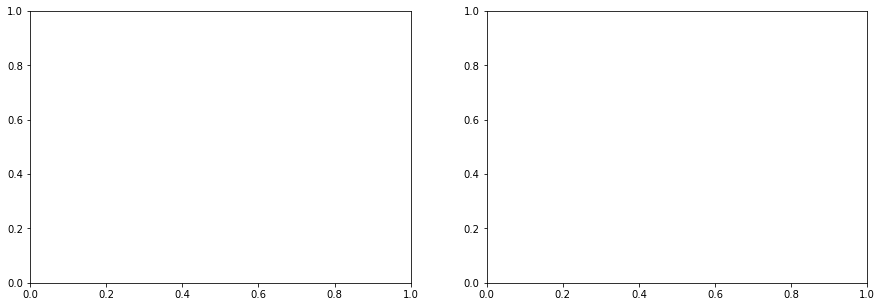

In [16]:
def plot_model_history(model_history, acc='acc', val_acc='val_acc'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [17]:
Y_val = validate_df['category']
y_pred =  model.predict_generator(validation_generator)

In [18]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [20]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val, y_final, target_names=['0','1'])

print(report)

TypeError: '<' not supported between instances of 'int' and 'str'

Preparing testing dataset

In [21]:
test_filenames = os.listdir("./test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

Create Testing Generator

In [22]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 12500 validated image filenames.


predict

In [23]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

see predicted result

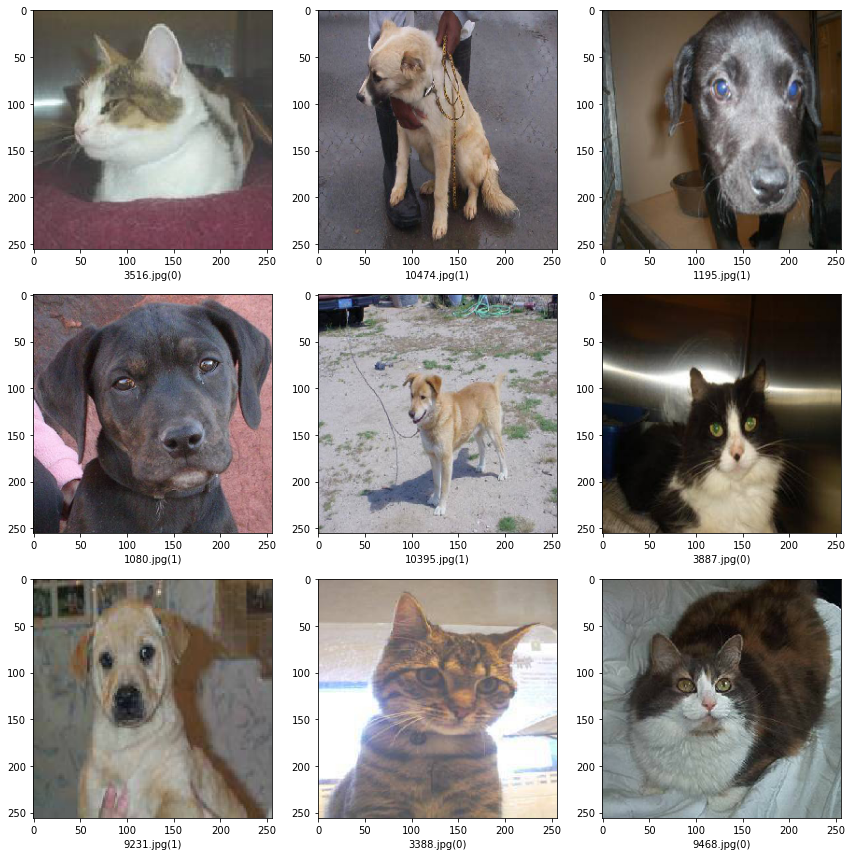

In [24]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test1/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

submission 

Text(0.5, 1.0, '(Test data)')

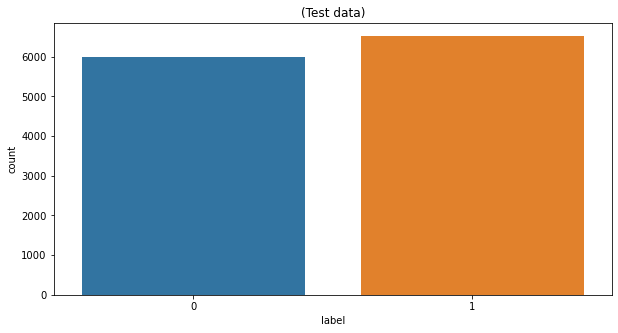

In [25]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)

plt.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
plt.title("(Test data)")

In [26]:
submission_df

,id,label
0,9809,1
1,12469,0
2,2567,0
3,8197,1
4,12288,0
...,...,...
12495,11892,1
12496,1743,1
12497,10345,1
12498,9553,0


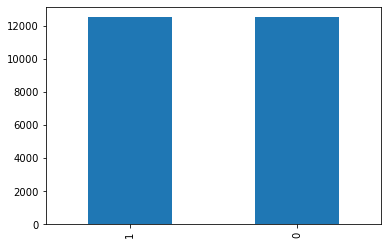

In [27]:
df['category'].value_counts().plot.bar() # no need of data augmentation as teh data is prety even , we would need data if we want to use bagging techniques 

In [28]:
print("avg")
print(sum(wid)//len(wid))
print(sum(hei)//len(hei))

avg


NameError: name 'wid' is not defined

In [29]:
  in_layer = tf.keras.Input(shape=(None, None,3))
  x = tf.keras.layers.Conv2D(16,(4,4), activation = 'elu')(in_layer)  # single stride 4x4 filter for 16 maps
  x = tf.keras.layers.Conv2D(32,(4,4), activation = 'elu')(x)         # single stride 4x4 filter for 32 maps
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Conv2D(64,(4,4), activation = 'elu')(x)         # single stride 4x4 filter for 64 maps
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Conv2D(128, (1,1))(x)                           # finally 128 maps for global average-pool
  x = tf.keras.layers.GlobalMaxPooling2D()(x)                     # pseudo-dense 128 layer
  output_layer = tf.keras.layers.Dense(10, activation = "softmax")(x) # softmax output
  model = tf.keras.Model(inputs = in_layer, outputs=output_layer)
  model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                metrics=["accuracy"])
               
            

In [30]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 16)    784       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, None, 32)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, None, 64)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)  

preparing test train dataset

In [31]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

training_denerator

In [32]:
image_size = 224
input_shape = (image_size, image_size, 3)
epochs = 10
batch_size = 16

In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../input/train/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 0 validated image filenames belonging to 0 classes.


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 22500 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [34]:
os("./train"+FILE_NAMES[0]).to_numpy()

TypeError: 'module' object is not callable